In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df=df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'	})
df.sample(5)

,CustomerID,Gender,Age,income,score
161,162,Female,29,79,83
72,73,Female,60,50,49
102,103,Male,67,62,59
100,101,Female,23,62,41
97,98,Female,27,60,50


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
income,0
score,0


In [ ]:
df.describe()

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


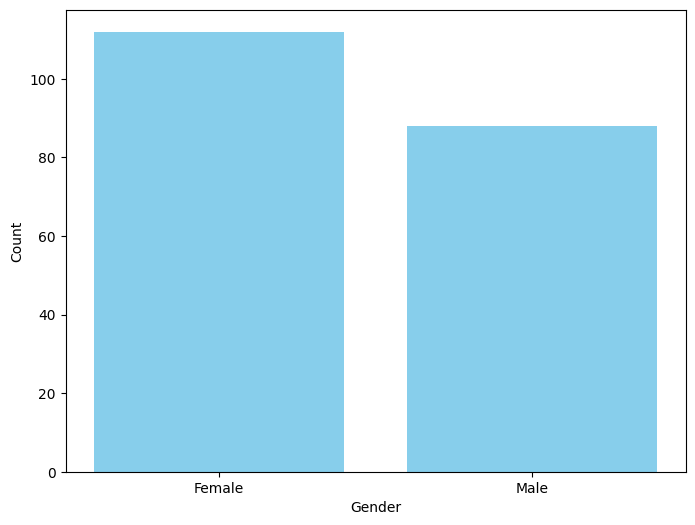

In [ ]:
gen_counts=df['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(gen_counts.keys(),gen_counts.values,color='skyblue')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
import seaborn as sns


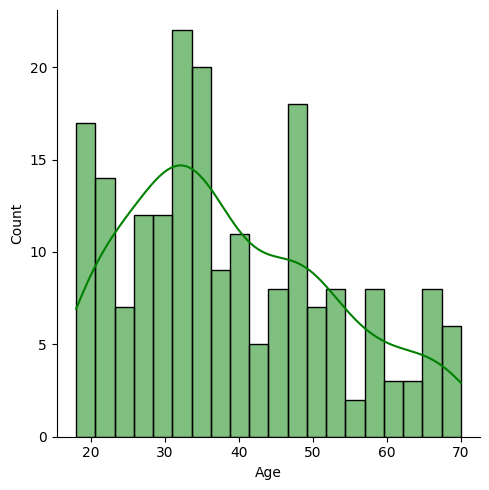

In [ ]:
sns.displot(df['Age'], kde=True, color='green',bins=20)

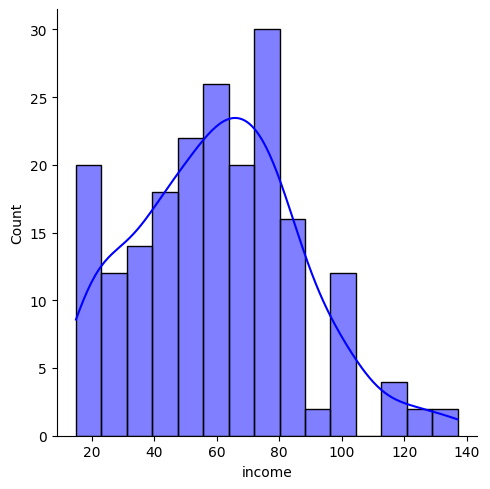

In [ ]:
sns.displot(df['income'], kde=True, color='blue',bins=15)

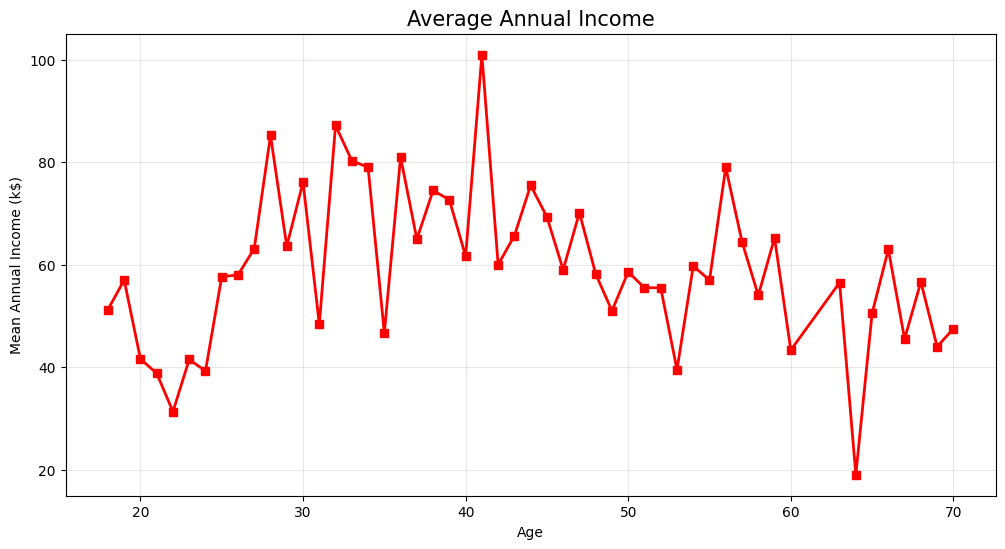

In [ ]:

age_income = df.groupby('Age')['income'].mean()
plt.figure(figsize=(12, 6))
plt.plot(age_income.index, age_income.values, color='red', linewidth=2, marker='s')
plt.title('Average Annual Income', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Mean Annual Income (k$)')
plt.grid(alpha=0.3)
plt.show()

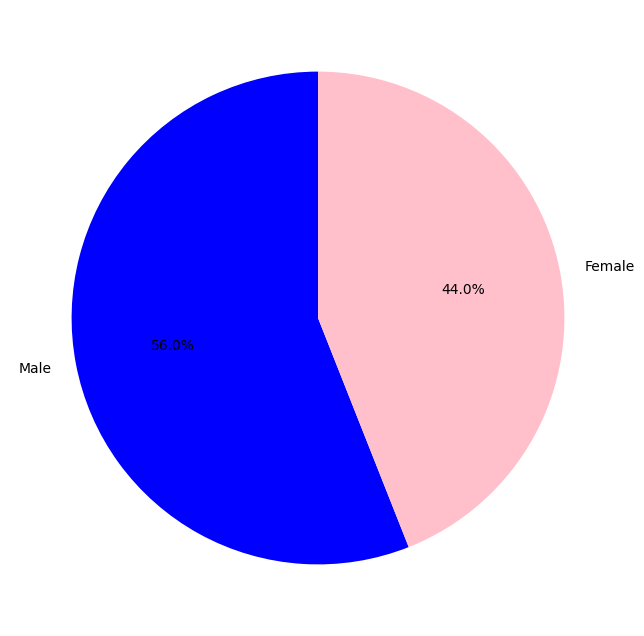

In [ ]:
labels=['Male','Female']
size=gen_counts.values
colors=['blue','pink']
plt.figure(figsize=(8,8))
plt.pie(size,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
plt.show()



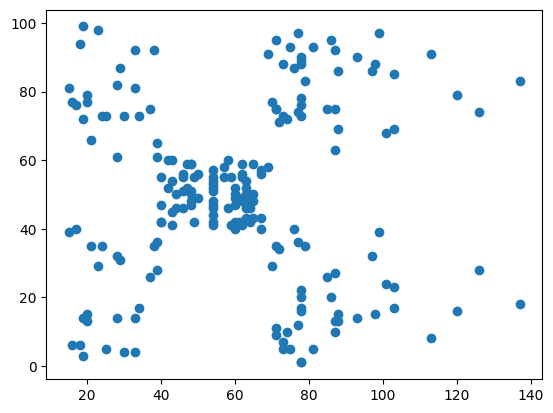

In [ ]:
plt.scatter(df['income'],df['score'])

In [ ]:
df.drop(columns=['CustomerID','Gender'],inplace=True)


In [ ]:
df.sample(5)

,Age,income,score
103,26,62,55
128,59,71,11
12,58,20,15
106,66,63,50
183,29,98,88


In [ ]:
df.head()

,Age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
scaled=pd.DataFrame(scaled,columns=df.columns)
scaled.head()


,Age,income,score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [ ]:
from numpy.random import RandomState
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
   kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
   kmeans.fit(scaled)
   wcss.append(kmeans.inertia_)

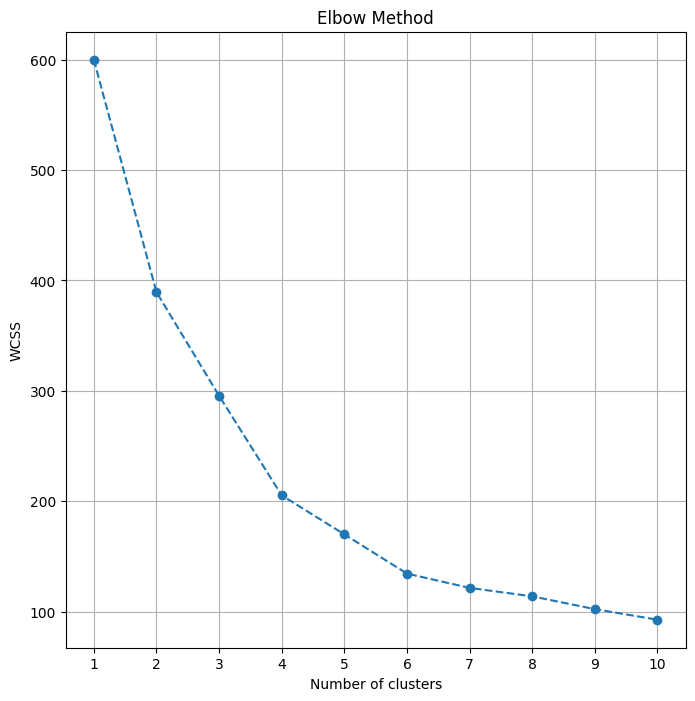

In [ ]:
from matplotlib.lines import lineMarkers
plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

In [ ]:
kmeans_2=KMeans(n_clusters=5,init='k-means++',random_state=42)
cluster_labels=kmeans_2.fit_predict(scaled)

df['Cluster']=cluster_labels
print(df['Cluster'].value_counts())
df.head()



Cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64


,Age,income,score,Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


<Axes: xlabel='income', ylabel='score'>

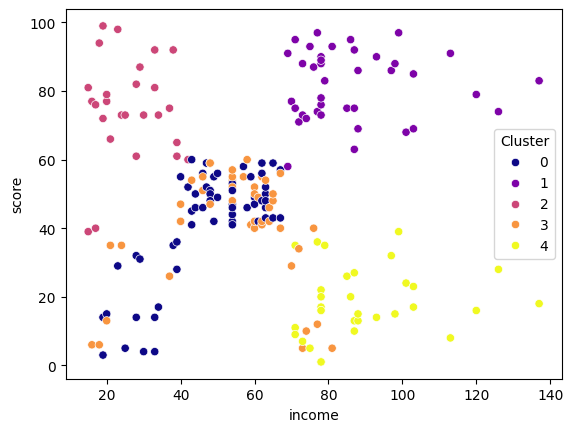

In [ ]:
sns.scatterplot(data=df,x='income',y='score',hue='Cluster',palette='plasma')

In [ ]:

cluster_summary = df.groupby('Cluster')[['Age', 'income', 'score']].mean()
cluster_summary = cluster_summary.round(2)
print(cluster_summary.sort_values(by='income'))

           Age  income  score
Cluster                      
2        25.77   26.12  74.85
0        55.28   47.62  41.71
3        26.73   54.31  40.91
1        32.88   86.10  81.53
4        44.39   89.77  18.48


In [ ]:
import joblib

# Save the version WITHOUT gender
joblib.dump(kmeans_2, 'mall_model_v2.pkl')
joblib.dump(scaler, 'mall_scaler_v2.pkl')

['mall_scaler_v2.pkl']